In [182]:
# IPO Data extracted from IPOScoop.com for all rated IPOs from year 2000 to present (Aug 21, 2021)
# Compare with SP 500
# Features include Month, Week Day, Lead Mgr, Total Underwriters, Gap % and $ between offer and open, 
# Offer and Opening Prices, SP Close to Open Chg Pct, SP Week Change
# Step 1 Exam and Clean raw data
# Step 2 Analyze data, eleminate errors and bias
# Step 3 Feature engineering, categorize data
# Step 4 Use Patsy to build matrix
# Step 5 Logistic regression. 1 = Buy, 0 = No buy

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

In [184]:
# exam raw data
%matplotlib inline
ipos = pd.read_csv('IPO-Rating-Performance.csv', encoding='UTF-8')
ipos

,Date,Issuer,Symbol,Lead Mgr,Offer Price,Opening Price,1st Day Close,% Px Chng,Chg Opening,Chg Close,Ratings,Performed
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,$14.00,$14.75,$12.75,-8.93%,0.75,-1.25,2,NaN
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,$11.00,$11.03,$11.63,5.73%,0.03,0.63,1,NaN
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,$13.50,$13.50,$13.50,0.00%,0.00,0.00,1,NaN
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,$13.00,$13.85,$13.51,3.92%,0.85,0.51,1,NaN
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,$10.00,$10.52,$10.45,4.50%,0.52,0.45,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3626,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,$16.00,$21.94,$23.31,45.70%,5.94,7.31,3,NaN
3627,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,$20.00,$22.06,$24.50,22.50%,2.06,4.50,2,NaN
3628,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,$10.69,$12.00,$13.38,25.12%,1.31,2.69,1,NaN
3629,2000-12-12,GenVec,GNVC,J.P. Morgan,$9.50,$10.56,$9.88,3.95%,1.06,0.38,2,NaN


In [185]:
# clean up data by eleminate % and $
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else
x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else
x.replace('%',''))
ipos

,Date,Issuer,Symbol,Lead Mgr,Offer Price,Opening Price,1st Day Close,% Px Chng,Chg Opening,Chg Close,Ratings,Performed
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.75,12.75,-8.93,0.75,-1.25,2,NaN
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.03,11.63,5.73,0.03,0.63,1,NaN
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.50,13.50,0.00,0.00,0.00,1,NaN
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.85,13.51,3.92,0.85,0.51,1,NaN
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.52,10.45,4.50,0.52,0.45,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3626,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.94,23.31,45.70,5.94,7.31,3,NaN
3627,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.06,24.50,22.50,2.06,4.50,2,NaN
3628,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.00,13.38,25.12,1.31,2.69,1,NaN
3629,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.56,9.88,3.95,1.06,0.38,2,NaN


In [186]:
# check data type
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3631 entries, 0 to 3630
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3631 non-null   object 
 1   Issuer         3631 non-null   object 
 2   Symbol         3631 non-null   object 
 3   Lead Mgr       3631 non-null   object 
 4   Offer Price    3631 non-null   object 
 5   Opening Price  3631 non-null   object 
 6   1st Day Close  3631 non-null   object 
 7   % Px Chng      3630 non-null   object 
 8   Chg Opening    3631 non-null   float64
 9   Chg Close      3631 non-null   float64
 10  Ratings        3631 non-null   object 
 11  Performed      407 non-null    object 
dtypes: float64(2), object(10)
memory usage: 340.5+ KB


In [187]:
# clean up NC values
ipos.replace('NC',0, inplace=True)
ipos.replace('N/C',0, inplace=True)
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['% Px Chng'] = ipos['% Px Chng '].astype('float')
ipos['$ Chg Close'] = ipos['Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['Chg Opening'].astype('float')
ipos['Ratings'] = ipos['Ratings'].astype('int')

<AxesSubplot:title={'center':'1st Day Median IPO Percentage Change'}, xlabel='Date'>

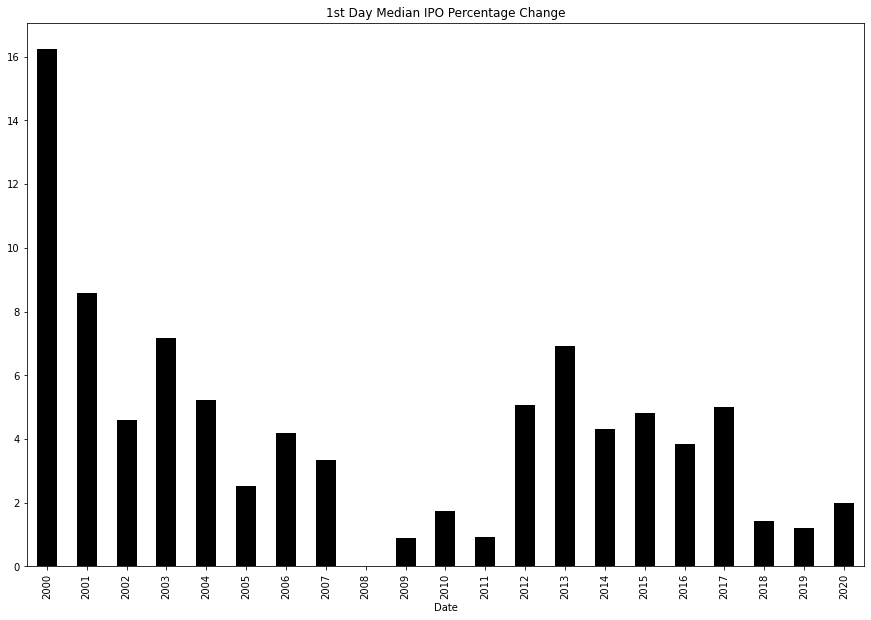

In [188]:
# group data by year and visualize
ipos.groupby(ipos['Date'].dt.year)['% Px Chng']\
.median().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Median IPO Percentage Change')

In [189]:
ipos['% Px Chng'].describe()

count    3630.000000
mean       13.589339
std        28.603905
min       -41.080000
25%         0.000000
50%         3.850000
75%        19.617500
max       353.850000
Name: % Px Chng, dtype: float64

<AxesSubplot:>

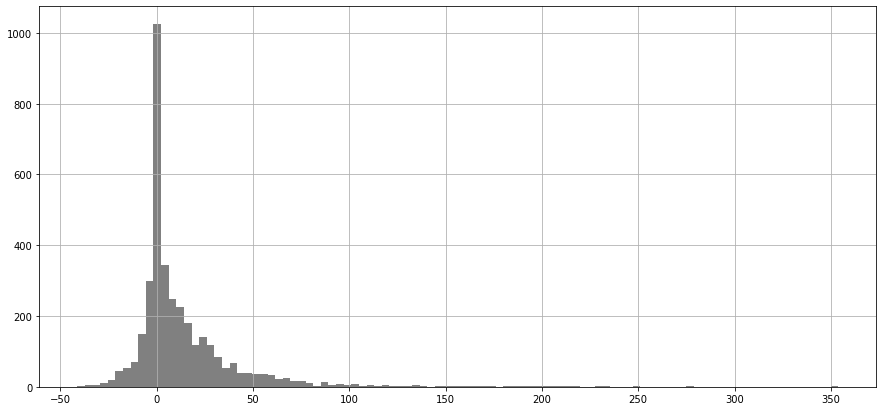

In [190]:
ipos['% Px Chng'].hist(figsize=(15,7), bins=100, color='grey')

In [191]:
# by analyzing above diagram, notice that most returns are close to 0, but a long tail towards right side
# right side of the above diagram represents the super successful IPOs
# Any chance for people who get in on the first day? or people have to get in with the Offer Price to get high return?
# create more column to exam the above question
#ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
#ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100
#ipos['% Chg Open to Close'].describe()
# ipos.to_csv('check.csv', index = False)

# above exam returns unrealistic 98.5% down after opening.
# consider eleminating outliars
# ipos.drop([2512])
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100
ipos['% Chg Open to Close'].describe()


count    3631.000000
mean        1.321612
std        11.819446
min       -98.522167
25%        -2.890110
50%         0.000000
75%         3.826658
max       217.365269
Name: % Chg Open to Close, dtype: float64

<AxesSubplot:>

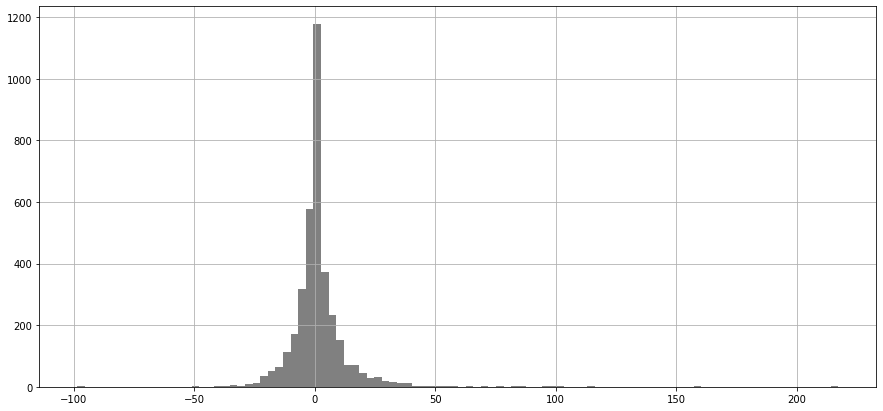

In [192]:
ipos['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='grey')

In [193]:
# check more recent data (2015 to present)
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].describe()

count    1113.000000
mean        0.203217
std         2.539481
min       -10.000000
25%        -0.520000
50%         0.000000
75%         0.490000
max        20.590000
Name: $ Chg Open to Close, dtype: float64

In [194]:
# ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].sum()
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    501.000000
mean       1.624511
std        2.858715
min        0.010000
25%        0.120000
50%        0.640000
75%        1.780000
max       20.590000
Name: $ Chg Open to Close, dtype: float64

In [195]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe()

count    519.000000
mean      -1.132370
std        1.485732
min      -10.000000
25%       -1.530000
50%       -0.620000
75%       -0.120000
max       -0.010000
Name: $ Chg Open to Close, dtype: float64

In [196]:
# from above result of recent data, if invest in all companies, about half earn, half loss
# apply feature engineering
# get sp500 5 yr historical data
sp = pd.read_csv('SP500_Historical.csv')
sp.sort_values('Date', inplace=True)
sp.reset_index(drop=True, inplace=True)
sp

,Date,Open,High,Low,Close
0,2016-08-08,2183.76,2185.44,2177.85,2180.89
1,2016-08-09,2182.24,2187.66,2178.61,2181.74
2,2016-08-10,2182.81,2183.41,2172.00,2175.49
3,2016-08-11,2177.97,2188.45,2177.97,2185.79
4,2016-08-12,2183.74,2186.28,2179.42,2184.05
...,...,...,...,...,...
1253,2021-07-30,4395.12,4412.25,4389.65,4395.26
1254,2021-08-02,4406.86,4422.18,4384.81,4387.16
1255,2021-08-03,4392.74,4423.79,4373.00,4423.15
1256,2021-08-04,4415.95,4416.17,4400.23,4402.66


In [208]:
# check 7-day change
def get_week_chg(ipo_dt):
    try:
        day_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 8
        chg = (sp.iloc[day_ago_idx]['Close'] - sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [209]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)
# delete error data
# ipos = ipos.dropna()

error 2020-01-17
error 2020-01-17
error 2020-01-17
error 2020-01-17
error 2020-01-24
error 2020-01-24
error 2020-01-28
error 2020-01-29
error 2020-01-29
error 2020-01-31
error 2020-01-31
error 2020-01-31
error 2020-02-04
error 2020-02-06
error 2020-02-06
error 2020-02-06
error 2020-02-06
error 2020-02-07
error 2020-02-07
error 2020-02-07
error 2020-02-11
error 2020-02-11
error 2020-02-12
error 2020-02-13
error 2020-02-13
error 2020-02-13
error 2020-02-14
error 2020-02-14
error 2020-02-20
error 2020-02-21
error 2020-02-24
error 2020-02-28
error 2020-03-03
error 2020-03-06
error 2020-03-06
error 2020-03-11
error 2020-03-12
error 2020-04-01
error 2020-04-03
error 2020-04-08
error 2020-04-22
error 2020-04-24
error 2020-04-24
error 2020-04-24
error 2020-04-28
error 2020-04-30
error 2020-05-01
error 2020-05-01
error 2020-05-05
error 2020-05-06
error 2020-05-06
error 2020-05-08
error 2020-05-08
error 2020-05-08
error 2020-05-14
error 2020-05-14
error 2020-05-15
error 2020-05-15
error 2020-05-

error 2018-10-16
error 2018-10-17
error 2018-10-18
error 2018-10-18
error 2018-10-18
error 2018-10-19
error 2018-10-19
error 2018-10-19
error 2018-10-24
error 2018-10-25
error 2018-10-25
error 2018-10-25
error 2018-10-26
error 2018-10-31
error 2018-10-31
error 2018-10-31
error 2018-11-07
error 2018-11-09
error 2018-11-13
error 2018-11-14
error 2018-11-15
error 2018-11-15
error 2018-11-16
error 2018-11-16
error 2018-11-16
error 2018-11-20
error 2018-11-28
error 2018-12-06
error 2018-12-07
error 2018-12-07
error 2018-12-11
error 2018-12-12
error 2018-12-13
error 2018-12-14
error 2018-12-14
error 2018-12-14
error 2017-01-13
error 2017-01-20
error 2017-01-20
error 2017-01-26
error 2017-01-27
error 2017-02-01
error 2017-02-01
error 2017-02-03
error 2017-02-03
error 2017-02-10
error 2017-02-10
error 2017-03-01
error 2017-03-02
error 2017-03-08
error 2017-03-08
error 2017-03-10
error 2017-03-10
error 2017-03-15
error 2017-03-16
error 2017-03-17
error 2017-03-17
error 2017-03-24
error 2017-03-

error 2014-03-13
error 2014-03-13
error 2014-03-13
error 2014-03-19
error 2014-03-20
error 2014-03-20
error 2014-03-20
error 2014-03-21
error 2014-03-21
error 2014-03-21
error 2014-03-21
error 2014-03-21
error 2014-03-21
error 2014-03-26
error 2014-03-26
error 2014-03-27
error 2014-03-27
error 2014-03-27
error 2014-03-28
error 2014-03-28
error 2014-03-28
error 2014-03-28
error 2014-03-28
error 2014-03-28
error 2014-04-01
error 2014-04-02
error 2014-04-03
error 2014-04-03
error 2014-04-04
error 2014-04-04
error 2014-04-04
error 2014-04-04
error 2014-04-09
error 2014-04-09
error 2014-04-10
error 2014-04-10
error 2014-04-10
error 2014-04-11
error 2014-04-11
error 2014-04-11
error 2014-04-11
error 2014-04-11
error 2014-04-15
error 2014-04-15
error 2014-04-16
error 2014-04-16
error 2014-04-16
error 2014-04-17
error 2014-04-17
error 2014-04-17
error 2014-04-17
error 2014-04-17
error 2014-04-25
error 2014-05-02
error 2014-05-02
error 2014-05-02
error 2014-05-02
error 2014-05-07
error 2014-05-

error 2012-03-07
error 2012-03-08
error 2012-03-15
error 2012-03-15
error 2012-03-15
error 2012-03-19
error 2012-03-21
error 2012-03-22
error 2012-03-22
error 2012-03-22
error 2012-03-23
error 2012-03-23
error 2012-03-28
error 2012-03-28
error 2012-03-28
error 2012-03-29
error 2012-03-29
error 2012-03-29
error 2012-03-29
error 2012-03-30
error 2012-03-30
error 2012-04-04
error 2012-04-05
error 2012-04-11
error 2012-04-12
error 2012-04-12
error 2012-04-12
error 2012-04-17
error 2012-04-18
error 2012-04-19
error 2012-04-19
error 2012-04-20
error 2012-04-20
error 2012-04-20
error 2012-04-25
error 2012-04-25
error 2012-04-26
error 2012-04-27
error 2012-04-27
error 2012-05-01
error 2012-05-03
error 2012-05-03
error 2012-05-03
error 2012-05-04
error 2012-05-04
error 2012-05-10
error 2012-05-10
error 2012-05-10
error 2012-05-11
error 2012-05-11
error 2012-05-18
error 2012-06-28
error 2012-06-27
error 2012-06-28
error 2012-06-29
error 2012-07-19
error 2012-07-19
error 2012-07-20
error 2012-07-

error 2008-02-14
error 2008-02-14
error 2008-02-14
error 2008-02-19
error 2008-02-26
error 2008-02-27
error 2008-03-10
error 2008-03-11
error 2008-03-18
error 2008-03-18
error 2008-03-18
error 2008-04-21
error 2008-04-22
error 2008-04-24
error 2008-04-24
error 2008-04-30
error 2008-05-07
error 2008-05-07
error 2008-05-08
error 2008-05-14
error 2008-05-14
error 2008-05-15
error 2008-05-28
error 2008-06-18
error 2008-06-18
error 2008-06-25
error 2008-07-02
error 2008-07-23
error 2008-07-23
error 2008-07-29
error 2008-08-04
error 2008-08-07
error 2008-08-12
error 2008-11-19
error 2007-01-11
error 2007-01-18
error 2007-01-22
error 2007-01-24
error 2007-01-24
error 2007-01-30
error 2007-01-30
error 2007-01-30
error 2007-01-30
error 2007-01-31
error 2007-02-01
error 2007-02-05
error 2007-02-05
error 2007-02-06
error 2007-02-06
error 2007-02-07
error 2007-02-07
error 2007-02-07
error 2007-02-07
error 2007-02-08
error 2007-02-08
error 2007-02-08
error 2007-02-08
error 2007-02-09
error 2007-02-

error 2006-11-20
error 2006-11-20
error 2006-11-20
error 2006-11-21
error 2006-11-27
error 2006-11-28
error 2006-11-29
error 2006-12-04
error 2006-12-06
error 2006-12-07
error 2006-12-07
error 2006-12-07
error 2006-12-12
error 2006-12-12
error 2006-12-12
error 2006-12-12
error 2006-12-13
error 2006-12-13
error 2006-12-13
error 2006-12-13
error 2006-12-13
error 2006-12-13
error 2006-12-13
error 2006-12-14
error 2006-12-14
error 2006-12-14
error 2006-12-14
error 2006-12-14
error 2006-12-14
error 2006-12-14
error 2006-12-18
error 2006-12-18
error 2006-12-18
error 2006-12-18
error 2006-12-18
error 2006-12-18
error 2006-12-19
error 2006-12-19
error 2006-12-19
error 2006-12-19
error 2006-12-20
error 2006-12-20
error 2006-12-21
error 2005-01-20
error 2005-01-20
error 2005-01-20
error 2005-01-25
error 2005-01-25
error 2005-01-26
error 2005-01-27
error 2005-01-27
error 2005-01-27
error 2005-02-02
error 2005-02-02
error 2005-02-02
error 2005-02-03
error 2005-02-03
error 2005-02-03
error 2005-02-

error 2001-08-10
error 2001-08-14
error 2001-10-04
error 2001-10-11
error 2001-10-23
error 2001-10-25
error 2001-10-25
error 2001-10-30
error 2001-10-31
error 2001-10-31
error 2001-11-06
error 2001-11-13
error 2001-11-13
error 2001-11-13
error 2001-11-15
error 2001-11-15
error 2001-11-15
error 2001-11-16
error 2001-11-16
error 2001-11-20
error 2001-11-21
error 2001-11-21
error 2001-11-29
error 2001-12-05
error 2001-12-07
error 2001-12-11
error 2001-12-11
error 2001-12-12
error 2001-12-13
error 2001-12-13
error 2001-12-13
error 2001-12-14
error 2001-12-14
error 2001-12-14
error 2001-12-14
error 2000-05-12
error 2000-05-18
error 2000-05-18
error 2000-05-18
error 2000-05-18
error 2000-05-19
error 2000-05-19
error 2000-05-19
error 2000-05-23
error 2000-05-24
error 2000-05-24
error 2000-05-25
error 2000-05-25
error 2000-05-31
error 2000-05-31
error 2000-06-01
error 2000-06-01
error 2000-06-02
error 2000-06-07
error 2000-06-09
error 2000-06-13
error 2000-06-13
error 2000-06-14
error 2000-06-

In [210]:
# corrected data
ipos
# ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

,Date,Issuer,Symbol,Lead Mgr,Offer Price,Opening Price,1st Day Close,% Px Chng,Chg Opening,Chg Close,...,$ Chg Opening,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2020-01-17,I-Mab,IMAB,Jefferies,14.00,14.75,12.75,-8.93,0.75,-1.25,...,0.75,-2.00,-13.559322,None,None,1,Fri,Jan,5.084746,13.559322
1,2020-01-17,LIZHI,LIZI,CSFB,11.00,11.03,11.63,5.73,0.03,0.63,...,0.03,0.60,5.439710,None,None,1,Fri,Jan,0.271985,5.439710
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup,13.50,13.50,13.50,0.00,0.00,0.00,...,0.00,0.00,0.000000,None,None,1,Fri,Jan,0.000000,0.000000
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities,13.00,13.85,13.51,3.92,0.85,0.51,...,0.85,-0.34,-2.454874,None,None,1,Fri,Jan,6.137184,2.454874
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank,10.00,10.52,10.45,4.50,0.52,0.45,...,0.52,-0.07,-0.665399,None,None,1,Fri,Jan,4.942966,0.665399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.94,23.31,45.70,5.94,7.31,...,5.94,1.37,6.244303,None,None,1,Fri,Dec,27.073838,6.244303
3627,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs,20.00,22.06,24.50,22.50,2.06,4.50,...,2.06,2.44,11.060743,None,None,1,Fri,Dec,9.338169,11.060743
3628,2000-12-11,Gemplus,GEMP,CSFB,10.69,12.00,13.38,25.12,1.31,2.69,...,1.31,1.38,11.500000,None,None,1,Mon,Dec,10.916667,11.500000
3629,2000-12-12,GenVec,GNVC,JP Morgan,9.50,10.56,9.88,3.95,1.06,0.38,...,1.06,-0.68,-6.439394,None,None,1,Tues,Dec,10.037879,6.439394


In [200]:
# check sp500 between end of pre-IPO day and 1st open
def get_cto_chg(ipo_dt):
    try:
        today_open_idx = sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        chg = (sp.iloc[today_open_idx]['Open'] - \
        sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)

error 2020-01-17 00:00:00
error 2020-01-17 00:00:00
error 2020-01-17 00:00:00
error 2020-01-17 00:00:00
error 2020-01-24 00:00:00
error 2020-01-24 00:00:00
error 2020-01-28 00:00:00
error 2020-01-29 00:00:00
error 2020-01-29 00:00:00
error 2020-01-31 00:00:00
error 2020-01-31 00:00:00
error 2020-01-31 00:00:00
error 2020-02-04 00:00:00
error 2020-02-06 00:00:00
error 2020-02-06 00:00:00
error 2020-02-06 00:00:00
error 2020-02-06 00:00:00
error 2020-02-07 00:00:00
error 2020-02-07 00:00:00
error 2020-02-07 00:00:00
error 2020-02-11 00:00:00
error 2020-02-11 00:00:00
error 2020-02-12 00:00:00
error 2020-02-13 00:00:00
error 2020-02-13 00:00:00
error 2020-02-13 00:00:00
error 2020-02-14 00:00:00
error 2020-02-14 00:00:00
error 2020-02-20 00:00:00
error 2020-02-21 00:00:00
error 2020-02-24 00:00:00
error 2020-02-28 00:00:00
error 2020-03-03 00:00:00
error 2020-03-06 00:00:00
error 2020-03-06 00:00:00
error 2020-03-11 00:00:00
error 2020-03-12 00:00:00
error 2020-04-01 00:00:00
error 2020-0

error 2018-01-25 00:00:00
error 2018-01-26 00:00:00
error 2018-01-26 00:00:00
error 2018-01-26 00:00:00
error 2018-01-26 00:00:00
error 2018-01-30 00:00:00
error 2018-02-01 00:00:00
error 2018-02-01 00:00:00
error 2018-02-01 00:00:00
error 2018-02-01 00:00:00
error 2018-02-02 00:00:00
error 2018-02-08 00:00:00
error 2018-02-08 00:00:00
error 2018-02-08 00:00:00
error 2018-02-08 00:00:00
error 2018-02-08 00:00:00
error 2018-02-09 00:00:00
error 2018-02-09 00:00:00
error 2018-02-13 00:00:00
error 2018-02-14 00:00:00
error 2018-02-16 00:00:00
error 2018-02-16 00:00:00
error 2018-02-28 00:00:00
error 2018-03-08 00:00:00
error 2018-03-14 00:00:00
error 2018-03-14 00:00:00
error 2018-03-15 00:00:00
error 2018-03-16 00:00:00
error 2018-03-16 00:00:00
error 2018-03-16 00:00:00
error 2018-03-20 00:00:00
error 2018-03-23 00:00:00
error 2018-03-23 00:00:00
error 2018-03-27 00:00:00
error 2018-03-28 00:00:00
error 2018-03-28 00:00:00
error 2018-03-28 00:00:00
error 2018-03-29 00:00:00
error 2018-0

error 2016-07-14 00:00:00
error 2016-07-15 00:00:00
error 2016-07-15 00:00:00
error 2016-07-20 00:00:00
error 2016-07-21 00:00:00
error 2016-07-21 00:00:00
error 2016-07-22 00:00:00
error 2016-07-27 00:00:00
error 2016-07-28 00:00:00
error 2016-07-28 00:00:00
error 2016-07-29 00:00:00
error 2016-08-04 00:00:00
error 2016-08-04 00:00:00
error 2016-08-05 00:00:00
error 2016-08-05 00:00:00
error 2016-08-11 00:00:00
error 2016-08-11 00:00:00
error 2016-08-12 00:00:00
error 2016-08-19 00:00:00
error 2016-09-14 00:00:00
error 2016-09-15 00:00:00
error 2016-09-16 00:00:00
error 2016-09-16 00:00:00
error 2016-09-16 00:00:00
error 2016-09-21 00:00:00
error 2016-09-21 00:00:00
error 2016-09-22 00:00:00
error 2016-09-22 00:00:00
error 2016-09-23 00:00:00
error 2016-09-23 00:00:00
error 2016-09-23 00:00:00
error 2016-09-23 00:00:00
error 2016-09-29 00:00:00
error 2016-09-29 00:00:00
error 2016-09-29 00:00:00
error 2016-09-30 00:00:00
error 2016-10-06 00:00:00
error 2016-10-06 00:00:00
error 2016-1

error 2014-05-08 00:00:00
error 2014-05-09 00:00:00
error 2014-05-09 00:00:00
error 2014-05-09 00:00:00
error 2014-05-14 00:00:00
error 2014-05-15 00:00:00
error 2014-05-16 00:00:00
error 2014-05-16 00:00:00
error 2014-05-22 00:00:00
error 2014-05-22 00:00:00
error 2014-05-23 00:00:00
error 2014-05-23 00:00:00
error 2014-05-23 00:00:00
error 2014-05-23 00:00:00
error 2014-06-06 00:00:00
error 2014-06-06 00:00:00
error 2014-06-06 00:00:00
error 2014-06-12 00:00:00
error 2014-06-12 00:00:00
error 2014-06-12 00:00:00
error 2014-06-13 00:00:00
error 2014-06-13 00:00:00
error 2014-06-13 00:00:00
error 2014-06-18 00:00:00
error 2014-06-18 00:00:00
error 2014-06-18 00:00:00
error 2014-06-18 00:00:00
error 2014-06-18 00:00:00
error 2014-06-18 00:00:00
error 2014-06-19 00:00:00
error 2014-06-19 00:00:00
error 2014-06-19 00:00:00
error 2014-06-20 00:00:00
error 2014-06-20 00:00:00
error 2014-06-24 00:00:00
error 2014-06-25 00:00:00
error 2014-06-25 00:00:00
error 2014-06-25 00:00:00
error 2014-0

error 2012-03-02 00:00:00
error 2012-03-07 00:00:00
error 2012-03-08 00:00:00
error 2012-03-15 00:00:00
error 2012-03-15 00:00:00
error 2012-03-15 00:00:00
error 2012-03-19 00:00:00
error 2012-03-21 00:00:00
error 2012-03-22 00:00:00
error 2012-03-22 00:00:00
error 2012-03-22 00:00:00
error 2012-03-23 00:00:00
error 2012-03-23 00:00:00
error 2012-03-28 00:00:00
error 2012-03-28 00:00:00
error 2012-03-28 00:00:00
error 2012-03-29 00:00:00
error 2012-03-29 00:00:00
error 2012-03-29 00:00:00
error 2012-03-29 00:00:00
error 2012-03-30 00:00:00
error 2012-03-30 00:00:00
error 2012-04-04 00:00:00
error 2012-04-05 00:00:00
error 2012-04-11 00:00:00
error 2012-04-12 00:00:00
error 2012-04-12 00:00:00
error 2012-04-12 00:00:00
error 2012-04-17 00:00:00
error 2012-04-18 00:00:00
error 2012-04-19 00:00:00
error 2012-04-19 00:00:00
error 2012-04-20 00:00:00
error 2012-04-20 00:00:00
error 2012-04-20 00:00:00
error 2012-04-25 00:00:00
error 2012-04-25 00:00:00
error 2012-04-26 00:00:00
error 2012-0

error 2009-06-24 00:00:00
error 2009-06-24 00:00:00
error 2009-06-25 00:00:00
error 2009-06-26 00:00:00
error 2009-07-01 00:00:00
error 2009-07-30 00:00:00
error 2009-08-01 00:00:00
error 2009-08-06 00:00:00
error 2009-08-06 00:00:00
error 2009-08-10 00:00:00
error 2009-08-11 00:00:00
error 2009-09-16 00:00:00
error 2009-09-24 00:00:00
error 2009-09-24 00:00:00
error 2009-09-24 00:00:00
error 2009-09-24 00:00:00
error 2009-09-24 00:00:00
error 2009-09-25 00:00:00
error 2009-09-25 00:00:00
error 2009-10-01 00:00:00
error 2009-10-02 00:00:00
error 2009-10-02 00:00:00
error 2009-10-07 00:00:00
error 2009-10-07 00:00:00
error 2009-10-08 00:00:00
error 2009-10-08 00:00:00
error 2009-10-13 00:00:00
error 2009-10-16 00:00:00
error 2009-10-20 00:00:00
error 2009-10-21 00:00:00
error 2009-10-23 00:00:00
error 2009-10-28 00:00:00
error 2009-10-28 00:00:00
error 2009-11-05 00:00:00
error 2009-11-05 00:00:00
error 2009-11-06 00:00:00
error 2009-11-06 00:00:00
error 2009-11-13 00:00:00
error 2009-1

error 2006-04-11 00:00:00
error 2006-04-11 00:00:00
error 2006-04-11 00:00:00
error 2006-04-11 00:00:00
error 2006-04-12 00:00:00
error 2006-04-18 00:00:00
error 2006-04-18 00:00:00
error 2006-04-20 00:00:00
error 2006-04-20 00:00:00
error 2006-04-25 00:00:00
error 2006-04-25 00:00:00
error 2006-04-26 00:00:00
error 2006-04-27 00:00:00
error 2006-04-27 00:00:00
error 2006-05-03 00:00:00
error 2006-05-03 00:00:00
error 2006-05-04 00:00:00
error 2006-05-09 00:00:00
error 2006-05-09 00:00:00
error 2006-05-10 00:00:00
error 2006-05-11 00:00:00
error 2006-05-11 00:00:00
error 2006-05-11 00:00:00
error 2006-05-16 00:00:00
error 2006-05-16 00:00:00
error 2006-05-17 00:00:00
error 2006-05-18 00:00:00
error 2006-05-23 00:00:00
error 2006-05-24 00:00:00
error 2006-05-25 00:00:00
error 2006-05-31 00:00:00
error 2006-06-01 00:00:00
error 2006-06-01 00:00:00
error 2006-06-01 00:00:00
error 2006-06-02 00:00:00
error 2006-06-05 00:00:00
error 2006-06-06 00:00:00
error 2006-06-12 00:00:00
error 2006-0

error 2004-03-10 00:00:00
error 2004-03-15 00:00:00
error 2004-03-15 00:00:00
error 2004-03-16 00:00:00
error 2004-03-17 00:00:00
error 2004-03-17 00:00:00
error 2004-03-17 00:00:00
error 2004-03-18 00:00:00
error 2004-03-22 00:00:00
error 2004-03-24 00:00:00
error 2004-03-25 00:00:00
error 2004-03-25 00:00:00
error 2004-03-30 00:00:00
error 2004-03-30 00:00:00
error 2004-03-31 00:00:00
error 2004-04-05 00:00:00
error 2004-04-05 00:00:00
error 2004-04-06 00:00:00
error 2004-04-13 00:00:00
error 2004-04-16 00:00:00
error 2004-04-20 00:00:00
error 2004-04-20 00:00:00
error 2004-04-21 00:00:00
error 2004-04-22 00:00:00
error 2004-04-28 00:00:00
error 2004-04-29 00:00:00
error 2004-04-29 00:00:00
error 2004-05-05 00:00:00
error 2004-05-05 00:00:00
error 2004-05-06 00:00:00
error 2004-05-10 00:00:00
error 2004-05-11 00:00:00
error 2004-05-12 00:00:00
error 2004-05-19 00:00:00
error 2004-05-19 00:00:00
error 2004-05-24 00:00:00
error 2004-05-26 00:00:00
error 2004-05-26 00:00:00
error 2004-0

error 2001-07-24 00:00:00
error 2001-07-26 00:00:00
error 2001-07-27 00:00:00
error 2001-07-27 00:00:00
error 2001-07-31 00:00:00
error 2001-08-02 00:00:00
error 2001-08-07 00:00:00
error 2001-08-09 00:00:00
error 2001-08-10 00:00:00
error 2001-08-14 00:00:00
error 2001-10-04 00:00:00
error 2001-10-11 00:00:00
error 2001-10-23 00:00:00
error 2001-10-25 00:00:00
error 2001-10-25 00:00:00
error 2001-10-30 00:00:00
error 2001-10-31 00:00:00
error 2001-10-31 00:00:00
error 2001-11-06 00:00:00
error 2001-11-13 00:00:00
error 2001-11-13 00:00:00
error 2001-11-13 00:00:00
error 2001-11-15 00:00:00
error 2001-11-15 00:00:00
error 2001-11-15 00:00:00
error 2001-11-16 00:00:00
error 2001-11-16 00:00:00
error 2001-11-20 00:00:00
error 2001-11-21 00:00:00
error 2001-11-21 00:00:00
error 2001-11-29 00:00:00
error 2001-12-05 00:00:00
error 2001-12-07 00:00:00
error 2001-12-11 00:00:00
error 2001-12-11 00:00:00
error 2001-12-12 00:00:00
error 2001-12-13 00:00:00
error 2001-12-13 00:00:00
error 2001-1

In [201]:
# clean up Manage Bank
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.split('/')[0])
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())
for n in pd.DataFrame(ipos['Lead Mgr'].unique(),columns=['Name']).sort_values('Name')['Name']:
    print(n)

A.G. Edwards
A.G. Edwards & Sons
A.G. Edwrads & Sons
AG Edwards
AG Edwards & Sons
AG Edwrads
AMTD
AMTD Global Markets
Adams Harkness
Advest
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Alexander Capital
Anderson & Strudrick
Axiom
Axiom Capital Management
B. Riley FBR
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Banc of America
Banc of America Securities
Barclay Capital
Barclays
Barclays Capital
Bear Stearns
Bear Streans
Bear, Stearns
Benchmark
Benchmark Company
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lync
BofA Merrill Lynch
BofA Securities
Boustead Securities
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC Capital Markets
CIBC World Markets
CIBC Worldwide
CICC
CRT Capital
CRT Capital Group
CS First Boston
CSFB
CSFirst Boston
Canaccord Genuity
Cantor
Cantor Fitzgerald
Cantor Fitzger

In [202]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'
ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'
ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'
ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'
ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'
ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'
ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'
ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe,Bruyette & Woods'
ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'
ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'
ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = "Sandler O'neil + Partners"
ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = "Sandler O'Neil + Partners"
ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'
ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'
ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'
ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'
ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'
ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'
ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'
ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'
ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'
ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'
ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'
ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'
ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'
ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'
ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'
ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'
ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'
ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'
ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'
ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'
ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'
ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'
ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'
ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'
ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'
ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'
ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr'] = 'Cohen & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr'] = 'Leerink Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [203]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

A.G. Edwrads & Sons
AG Edwards
AG Edwrads
AMTD
AMTD Global Markets
Adams Harkness
Advest
Aegis Capital
Alexander Capital
Anderson & Strudrick
Axiom
Axiom Capital Management
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Banc of America
Barclays
Bear Stearns
Benchmark
Benchmark Company
BofA Merrill Lync
BofA Merrill Lynch
BofA Securities
Boustead Securities
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC
CICC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan
Chardan Capital Markets
Chase H&Q
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital
Craig-Hallum Capital Group
Credit Suiss
DA Davidson
DBAB
DLJ
DPO (Direct Public Offering)
Dain Rauscher Wessels
Dawson James Securities
Deutsche Bank
Donald
Donaldson Lufkin & Jenrette
Donaldson, Lufkin & Jenrette
Dougherty & Company
EarlyBirdCapital
Equity Securities
Evercore ISI
FIG Partners
FTN Midwest Securi

In [204]:
ipos['Total Underwriters'] = ipos['Lead Mgr'].map(lambda x: len(x.split('/')))
# add date related feature
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
ipos['Month'] = ipos['Date'].map(lambda x: x.month)
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
ipos

,Date,Issuer,Symbol,Lead Mgr,Offer Price,Opening Price,1st Day Close,% Px Chng,Chg Opening,Chg Close,...,% Px Chng,$ Chg Close,$ Chg Opening,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Total Underwriters,Week Day,Month
0,2020-01-17,I-Mab,IMAB,Jefferies,14.00,14.75,12.75,-8.93,0.75,-1.25,...,-8.93,-1.25,0.75,-2.00,-13.559322,None,None,1,Fri,Jan
1,2020-01-17,LIZHI,LIZI,CSFB,11.00,11.03,11.63,5.73,0.03,0.63,...,5.73,0.63,0.03,0.60,5.439710,None,None,1,Fri,Jan
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup,13.50,13.50,13.50,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,None,None,1,Fri,Jan
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities,13.00,13.85,13.51,3.92,0.85,0.51,...,3.92,0.51,0.85,-0.34,-2.454874,None,None,1,Fri,Jan
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank,10.00,10.52,10.45,4.50,0.52,0.45,...,4.50,0.45,0.52,-0.07,-0.665399,None,None,1,Fri,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.94,23.31,45.70,5.94,7.31,...,45.70,7.31,5.94,1.37,6.244303,None,None,1,Fri,Dec
3627,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs,20.00,22.06,24.50,22.50,2.06,4.50,...,22.50,4.50,2.06,2.44,11.060743,None,None,1,Fri,Dec
3628,2000-12-11,Gemplus,GEMP,CSFB,10.69,12.00,13.38,25.12,1.31,2.69,...,25.12,2.69,1.31,1.38,11.500000,None,None,1,Mon,Dec
3629,2000-12-12,GenVec,GNVC,JP Morgan,9.50,10.56,9.88,3.95,1.06,0.38,...,3.95,0.38,1.06,-0.68,-6.439394,None,None,1,Tues,Dec


In [207]:
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100
ipos['Open to Close Pct'] = abs((ipos['$ Chg Close'].astype('float') - ipos['$ Chg Opening'].astype('float')))/ipos['Opening Price'].astype('float') * 100
ipos

,Date,Issuer,Symbol,Lead Mgr,Offer Price,Opening Price,1st Day Close,% Px Chng,Chg Opening,Chg Close,...,$ Chg Opening,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2020-01-17,I-Mab,IMAB,Jefferies,14.00,14.75,12.75,-8.93,0.75,-1.25,...,0.75,-2.00,-13.559322,None,None,1,Fri,Jan,5.084746,13.559322
1,2020-01-17,LIZHI,LIZI,CSFB,11.00,11.03,11.63,5.73,0.03,0.63,...,0.03,0.60,5.439710,None,None,1,Fri,Jan,0.271985,5.439710
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup,13.50,13.50,13.50,0.00,0.00,0.00,...,0.00,0.00,0.000000,None,None,1,Fri,Jan,0.000000,0.000000
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities,13.00,13.85,13.51,3.92,0.85,0.51,...,0.85,-0.34,-2.454874,None,None,1,Fri,Jan,6.137184,2.454874
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank,10.00,10.52,10.45,4.50,0.52,0.45,...,0.52,-0.07,-0.665399,None,None,1,Fri,Jan,4.942966,0.665399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.94,23.31,45.70,5.94,7.31,...,5.94,1.37,6.244303,None,None,1,Fri,Dec,27.073838,6.244303
3627,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs,20.00,22.06,24.50,22.50,2.06,4.50,...,2.06,2.44,11.060743,None,None,1,Fri,Dec,9.338169,11.060743
3628,2000-12-11,Gemplus,GEMP,CSFB,10.69,12.00,13.38,25.12,1.31,2.69,...,1.31,1.38,11.500000,None,None,1,Mon,Dec,10.916667,11.500000
3629,2000-12-12,GenVec,GNVC,JP Morgan,9.50,10.56,9.88,3.95,1.06,0.38,...,1.06,-0.68,-6.439394,None,None,1,Tues,Dec,10.037879,6.439394


In [206]:
from patsy import dmatrix
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") + Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") + Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos, return_type='dataframe')
X

ValueError: negative dimensions are not allowed

In [ ]:
# train data from 2015
# Threshold $1
X_train, X_test = X[:1114], X[1114:]
y_train = ipos['$ Chg Open to Close'][:1114].map(lambda x: 1 if x >= 1 else 0)
y_test = ipos['$ Chg Open to Close'][1114:].map(lambda x: 1 if x >= 1 else 0)

In [ ]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

In [ ]:
# evaluate model
clf.score(X_test, y_test)
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].describe()

In [ ]:
# prediction
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf

In [ ]:
rf[rf['predicted']==1]['$ chg'].describe()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [ ]:
# Reduce threshold to $0.25
X_train, X_test = X[:2188], X[2188:]
y_train = ipos['$ Chg Open to Close'][:2188].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][2188:].map(lambda x: 1 if x >= .25 else 0)
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
# check result
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()